In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/siswa.csv')
df.head()


,NPM,NAMA,adil & amanah (A),suka membantu (B),nyambung kalau ngobrol (C),asyik & menarik (D)
0,24083010001,MADINA HEDY ALIFANTI,0.9,1.0,0.9,0.9
1,24083010003,MARIA DWI KURNIASIH,0.5,0.5,0.6,0.6
2,24083010005,ADINDA PUTRI RACHMAWATI,0.4,0.5,0.5,0.6
3,24083010006,AQUINA SYABITA,0.7,0.7,0.6,0.7
4,24083010007,VARID PUTRA PRATAMA,0.5,0.6,0.5,0.5


Kode di atas digunakan untuk membaca file csv yang telah diisi penilaian pada setiap mahasiswa. Nilai berkisar 0--1, semakin mendekati 1 berarti semakin baik, begitu juga sebaliknya.

## Matriks Skor

In [4]:
P = np.array([0.3, 0.4, 0.2, 0.1])

# Menghitung skor total
C = df[['adil & amanah (A)', 'suka membantu (B)', 'nyambung kalau ngobrol (C)', 'asyik & menarik (D)']].values
scores = C @ P
df["Skor"] = scores

df_sorted = df.sort_values(by="Skor", ascending=False).reset_index(drop=True)
top4 = df_sorted.head(4)

# Memberikan highlight pada top 4 skor
def highlight_top4(row):
    return ['background-color: yellow' if row.name < 4 else '' for _ in row]

styled_table = df_sorted.style.apply(highlight_top4, axis=1)

styled_table



,NPM,NAMA,adil & amanah (A),suka membantu (B),nyambung kalau ngobrol (C),asyik & menarik (D),Skor
0,24083010057,MAULIDA APRILIA PUTRI HANDAYANI,0.900000,1.000000,1.000000,0.900000,0.960000
1,24083010001,MADINA HEDY ALIFANTI,0.900000,1.000000,0.900000,0.900000,0.940000
2,24083010044,VIA AMANDA,0.800000,1.000000,1.000000,0.900000,0.930000
3,24083010045,FANNY WIDYA CAHYANI,0.800000,1.000000,0.900000,0.800000,0.900000
4,24083010059,Izzati Kamila Putri,0.800000,0.900000,0.900000,0.800000,0.860000
5,24083010042,AMELIA RIZQYNA PUTRI,0.800000,0.800000,0.900000,0.700000,0.810000
6,24083010077,Gendis Poerbodani,0.800000,0.800000,0.800000,0.800000,0.800000
7,24083010074,MAYA PURNAMA SARI,0.800000,0.700000,0.800000,0.800000,0.760000
8,24083010079,MUHAMMAD WILDAN SULTANSYAH,0.800000,0.700000,0.800000,0.700000,0.750000
9,24083010081,ESTHI NURANI SRI HANDAYANI,0.700000,0.800000,0.700000,0.700000,0.740000


P merupakan nilai pembobotan untuk setiap kolom A (0.3), B(0.4), C(0.2), D(0.1). Selanjutnya menghitung skor total dengan cara C (criteria) dikali dengan P. Dari kode perhitungan tersebut didapakan hasil skor akhir untuk setiap peserta. Selain itu, didapat top 4 skor tertinggi yaitu, Maulida Aprilia dengan skor 0.96, Madina Hedy (0.94), Via Amanda (0.93), dan Fanny Widya (0.90). Hal ini menunjukkan bahwa keempat mahasiswa tersebut memiliki kombinasi nilai yang paling sesuai dengan bobot prioritas yang telah ditentukan. Dengan kata lain, mereka dipandang lebih unggul atau lebih cocok dibandingkan mahasiswa lain dalam memenuhi aspek keadilan, kerjasama, komunikasi, serta daya tarik.

## Kovarian dan Korelasi

In [6]:
kriteria = df[['adil & amanah (A)', 'suka membantu (B)', 'nyambung kalau ngobrol (C)', 'asyik & menarik (D)']]
# Kovarian
cov_matrix = kriteria.cov()
display(cov_matrix)

# Matriks Korelasi
corr_matrix = kriteria.corr()
display(corr_matrix)

,adil & amanah (A),suka membantu (B),nyambung kalau ngobrol (C),asyik & menarik (D)
adil & amanah (A),0.020256,0.019238,0.021194,0.015931
suka membantu (B),0.019238,0.026208,0.024696,0.017854
nyambung kalau ngobrol (C),0.021194,0.024696,0.028866,0.019656
asyik & menarik (D),0.015931,0.017854,0.019656,0.016235


,adil & amanah (A),suka membantu (B),nyambung kalau ngobrol (C),asyik & menarik (D)
adil & amanah (A),1.000000,0.834934,0.876480,0.878502
suka membantu (B),0.834934,1.000000,0.897886,0.865570
nyambung kalau ngobrol (C),0.876480,0.897886,1.000000,0.907972
asyik & menarik (D),0.878502,0.865570,0.907972,1.000000


Berdasarkan hasil perhitungan, matriks kovarian menunjukkan bahwa seluruh pasangan kriteria (A, B, C, dan D) memiliki kovarian yang bernilai positif. Hal ini berarti setiap kenaikan pada satu kriteria cenderung diikuti oleh kenaikan pada kriteria lainnya. Misalnya, kovarian antara adil & amanah (A) dan nyambung kalau ngobrol (C) sebesar 0.021, menandakan adanya keterkaitan positif meskipun nilainya relatif kecil. Nilai kovarian yang rendah ini wajar karena skala penilaian berada dalam rentang terbatas (0–1).

Sementara itu, matriks korelasi memperlihatkan hubungan yang lebih jelas antar kriteria. Hampir semua korelasi antar dimensi berada pada kisaran 0.83–0.91 yang berarti hubungan antar kriteria sangat kuat dan positif. Contohnya, korelasi antara suka membantu (B) dan nyambung kalau ngobrol (C) mencapai 0.898, menunjukkan bahwa mahasiswa yang suka membantu cenderung juga mudah nyambung saat diajak ngobrol. Korelasi tertinggi tampak antara nyambung kalau ngobrol (C) dan asyik & menarik (D) sebesar 0.908, menandakan keduanya hampir sejalan.


## Cosine Similarity

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

C = df[['adil & amanah (A)', 'suka membantu (B)', 'nyambung kalau ngobrol (C)', 'asyik & menarik (D)']].values
cosine_sim = cosine_similarity(C)
cosine_df = pd.DataFrame(cosine_sim, index=df["NAMA"], columns=df["NAMA"])
display(cosine_df)

NAMA,MADINA HEDY ALIFANTI,MARIA DWI KURNIASIH,ADINDA PUTRI RACHMAWATI,AQUINA SYABITA,VARID PUTRA PRATAMA,GAITSA NAZWA KANSA,Mohammad Alimun Hakim,HIZKIA SAMHAN REZAYOSHI,RAVEENA AYU DESEMBER SURYOPUTRI,Yohanes Olvin Jun Sole,...,ESTHI NURANI SRI HANDAYANI,Muhammad Naufal Asruzzaman,Laudya Meitaneia Sianturi,ADRIAN VEDA DARMAWAN,SELVY DWI YULITA SARI,Rizky Faza Hafiyyan Nusantara,Indra Maulana R F Y,YUNIAR RACHMAWATI,KIKY MAUDRY NATASYA,NAJWA SOFIA
NAMA,,,,,,,,,,,,,,,,,,,,,
MADINA HEDY ALIFANTI,1.000000,0.992360,0.989064,0.997855,0.999369,0.985194,0.996200,0.994244,0.996200,0.996509,...,0.999917,0.998906,0.998906,0.998501,0.998906,0.998906,0.997248,0.993864,0.998906,0.998906
MARIA DWI KURNIASIH,0.992360,1.000000,0.995046,0.990504,0.988226,0.989594,0.991005,0.996820,0.997238,0.981556,...,0.991005,0.995893,0.995893,0.985466,0.995893,0.995893,0.983607,0.997197,0.995893,0.995893
ADINDA PUTRI RACHMAWATI,0.989064,0.995046,1.000000,0.988116,0.986797,0.988533,0.981570,0.996195,0.988386,0.983342,...,0.988386,0.990148,0.990148,0.985048,0.990148,0.990148,0.977117,0.988116,0.990148,0.990148
AQUINA SYABITA,0.997855,0.990504,0.988116,1.000000,0.996326,0.992504,0.997446,0.996326,0.992357,0.997208,...,0.997446,0.997949,0.997949,0.994972,0.997949,0.997949,0.997197,0.994536,0.997949,0.997949
VARID PUTRA PRATAMA,0.999369,0.988226,0.986797,0.996326,1.000000,0.980286,0.993210,0.990991,0.993210,0.997622,...,0.999744,0.996616,0.996616,0.999815,0.996616,0.996616,0.996820,0.989309,0.996616,0.996616
GAITSA NAZWA KANSA,0.985194,0.989594,0.988533,0.992504,0.980286,1.000000,0.989483,0.996624,0.983558,0.982960,...,0.983558,0.989762,0.989762,0.977110,0.989762,0.989762,0.981802,0.992504,0.989762,0.989762
Mohammad Alimun Hakim,0.996200,0.991005,0.981570,0.997446,0.993210,0.989483,1.000000,0.993210,0.995261,0.991360,...,0.995261,0.998221,0.998221,0.991066,0.998221,0.998221,0.997238,0.997446,0.998221,0.998221
HIZKIA SAMHAN REZAYOSHI,0.994244,0.996820,0.996195,0.996326,0.990991,0.996624,0.993210,1.000000,0.993210,0.989766,...,0.993210,0.996616,0.996616,0.988706,0.996616,0.996616,0.988226,0.996326,0.996616,0.996616
RAVEENA AYU DESEMBER SURYOPUTRI,0.996200,0.997238,0.988386,0.992357,0.993210,0.983558,0.995261,0.993210,1.000000,0.985663,...,0.995261,0.998221,0.998221,0.991066,0.998221,0.998221,0.991005,0.997446,0.998221,0.998221


Berdasarkan hasil perhitungan cosine similarity, terlihat bahwa mayoritas mahasiswa memiliki tingkat kemiripan yang sangat tinggi satu sama lain, dengan nilai di atas 0.98. Misalnya, Madina Hedy Alifanti memiliki similarity 0.9979 dengan Aquina Syabita dan 0.9994 dengan Varid Putra Pratama, hal itu menunjukkan bahwa profil penilaian sosial mereka hampir identik. Artinya, mereka dipersepsikan mirip dalam hal adil & amanah, suka membantu, nyambung kalau ngobrol, serta asyik & menarik.

Sementara itu, ada pasangan dengan similarity sedikit lebih rendah, seperti MAdina Hedy Alifanti dengan Gaitsa Nazwa Kansa sebesar 0.9851. Walaupun masih sangat tinggi, perbedaan ini menunjukkan adanya sedikit variasi dalam salah satu kriteria.

## PCA + Clustering

Explained Variance Ratio (PCA): [0.91016671 0.04218884]


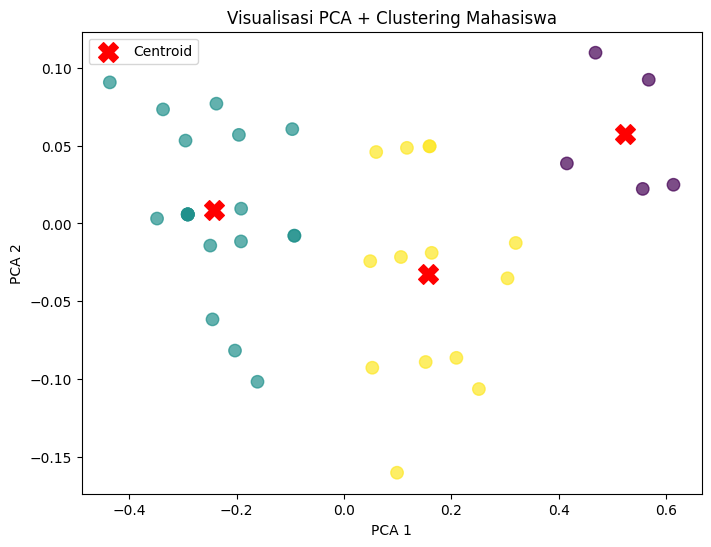

                               NAMA  Cluster
0             MADINA HEDY ALIFANTI         0
1              MARIA DWI KURNIASIH         1
2          ADINDA PUTRI RACHMAWATI         1
3                   AQUINA SYABITA         2
4              VARID PUTRA PRATAMA         1
5               GAITSA NAZWA KANSA         1
6            Mohammad Alimun Hakim         2
7          HIZKIA SAMHAN REZAYOSHI         1
8  RAVEENA AYU DESEMBER SURYOPUTRI         2
9           Yohanes Olvin Jun Sole         1


In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# === 1. Ambil data kriteria ===
X = df[['adil & amanah (A)',
        'suka membantu (B)',
        'nyambung kalau ngobrol (C)',
        'asyik & menarik (D)']].values

# === 2. PCA untuk reduksi dimensi ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)

# === 3. K-Means clustering ===
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # bisa coba k=2 atau 3
clusters = kmeans.fit_predict(X_pca)

# tambahkan hasil cluster ke dataframe
df["Cluster"] = clusters

# === 4. Visualisasi PCA + Clustering ===
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=80, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, label='Centroid')
plt.title("Visualisasi PCA + Clustering Mahasiswa")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

# === 5. Tampilkan hasil clustering ===
print(df[["NAMA", "Cluster"]].head(10))


Berdasarkan hasil analisis PCA dan clustering menggunakan metode K-Means, mahasiswa dapat dikelompokkan ke dalam tiga cluster utama yang divisualisasikan dalam bidang dua dimensi. Reduksi dimensi dengan PCA menunjukkan bahwa komponen utama pertama (PCA 1) mampu menjelaskan sekitar 91% variasi data, sedangkan komponen utama kedua (PCA 2) hanya menjelaskan sekitar 4% variasi. Hal ini berarti mayoritas informasi mengenai perbedaan karakteristik antar mahasiswa sudah terwakili pada sumbu PCA 1. Hasil clustering memperlihatkan adanya tiga kelompok dengan pusat (centroid) yang berbeda. Sebagian besar mahasiswa berada pada cluster biru dan kuning, yang mengindikasikan adanya kesamaan pola penilaian pada indikator adil & amanah, suka membantu, nyambung kalau ngobrol, serta asyik & menarik. Sementara itu, terdapat sekelompok mahasiswa dalam cluster ungu yang relatif kecil dan terpisah dari dua cluster lainnya, sehingga dapat diinterpretasikan bahwa kelompok ini memiliki karakteristik yang paling berbeda dibandingkan dengan mayoritas mahasiswa lainnya.